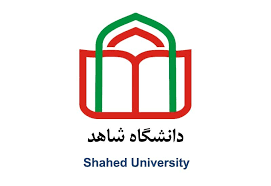

# Class 4

## sin

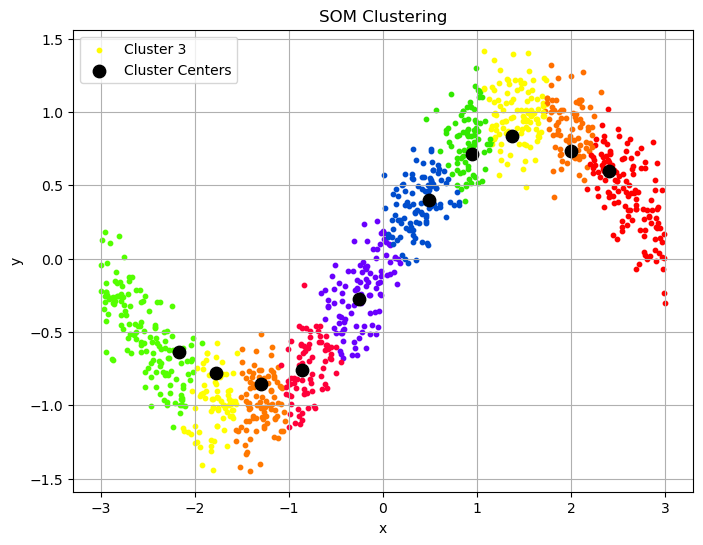

Sample data: [-1.6468902  -0.92949795]
Cluster corresponding to the sample: (8, 0)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom

# Generate data
x = 6 * np.random.rand(1000) - 3
noise = 0.2 * np.random.randn(x.size)
y = np.sin(x) + noise
X = np.array([x, y]).T

# Create Self-Organizing Map (SOM)
dimension1 = 10  
dimension2 = 1   
som = MiniSom(dimension1, dimension2, X.shape[1], sigma=3, learning_rate=0.5, neighborhood_function='gaussian')

# Train the model
som.train_random(X, 1000)  # Number of epochs

# Test the model
def get_winning_cluster(data, som):
    return np.array([som.winner(x) for x in data])

data_clusters = get_winning_cluster(X, som)

# Display clustering
plt.figure(figsize=(8, 6))
plt.title("SOM Clustering")
colors = plt.cm.prism(np.linspace(0, 1, dimension1 * dimension2))  # Color mapping for clusters
for i, coord in enumerate(data_clusters):
    cluster_index = coord[0] * dimension2 + coord[1]
    plt.scatter(X[i, 0], X[i, 1], color=colors[cluster_index], s=10, label=f"Cluster {cluster_index + 1}" if i == 0 else "")

# Display cluster centers
weights = som.get_weights().reshape(-1, 2)
plt.scatter(weights[:, 0], weights[:, 1], marker='o', c='black', s=80, label="Cluster Centers")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend(loc='best')
plt.show()

# Extract feature
sample_index = 200
sample = X[sample_index]
print("Sample data:", sample)
winning_cluster = som.winner(sample)
print("Cluster corresponding to the sample:", winning_cluster)


## OPTIONAL

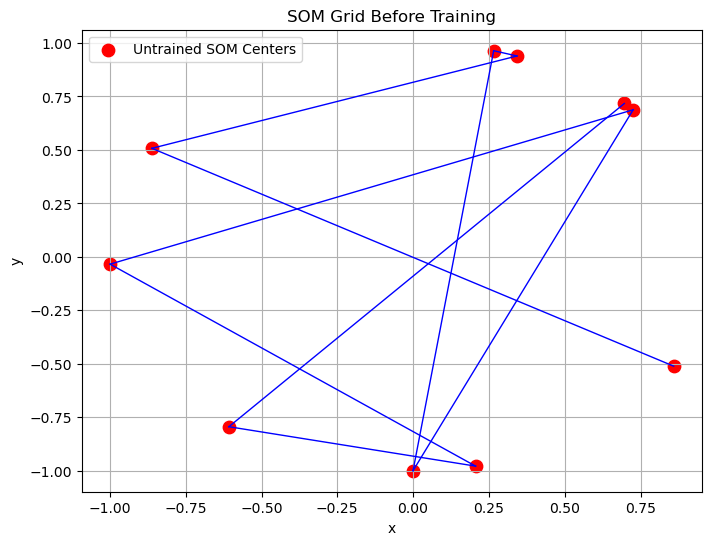

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom

# Generate data
x = 6 * np.random.rand(1000) - 3
noise = 0.2 * np.random.randn(x.size)
y = np.sin(x) + noise
X = np.array([x, y]).T

# Create Self-Organizing Map (SOM) before training
dimension1 = 10  # Number of neurons in one dimension
dimension2 = 1   # Number of neurons in the other dimension
som = MiniSom(dimension1, dimension2, X.shape[1], sigma=3, learning_rate=0.5, neighborhood_function='gaussian')

# Plot SOM weights before training
weights = som.get_weights().reshape(-1, 2)

# Visualizing SOM grid before training
plt.figure(figsize=(8, 6))
plt.title("SOM Grid Before Training")

# Plot the connections between neurons (according to the grid structure)
for i in range(dimension1):
    for j in range(dimension2):
        # Get the current and neighboring neurons (right and bottom neighbors)
        current_neuron = weights[i * dimension2 + j]
        
        # Right neighbor (if it exists)
        if j + 1 < dimension2:
            right_neuron = weights[i * dimension2 + (j + 1)]
            plt.plot([current_neuron[0], right_neuron[0]], [current_neuron[1], right_neuron[1]], c='blue', lw=1)
        
        # Bottom neighbor (if it exists)
        if i + 1 < dimension1:
            bottom_neuron = weights[(i + 1) * dimension2 + j]
            plt.plot([current_neuron[0], bottom_neuron[0]], [current_neuron[1], bottom_neuron[1]], c='blue', lw=1)

# Scatter plot of the neurons (weights)
plt.scatter(weights[:, 0], weights[:, 1], marker='o', c='red', s=80, label="Untrained SOM Centers")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend(loc='best')
plt.show()


## Thyroid

In [5]:
import numpy as np
import scipy.io
from sklearn.preprocessing import StandardScaler
from minisom import MiniSom
from sklearn.decomposition import PCA

# Load the data from the .mat file
data = scipy.io.loadmat('C:\\Users\\ASUS\\Desktop\\class of ann\\HOMEWORK4\\AMIR\\thyroid_dataset.mat')

# Extract input and target data
X = data['thyroidInputs']  # Input data
y = data['thyroidTargets']  # Target data

# Step 1: Normalize the data
scaler = StandardScaler()
X_norm = scaler.fit_transform(X.T).T  




#### Step 2: Simplified PCA using scikit-learn
#### pca = PCA(n_components=10)  # Define PCA with 10 components
#### X_reduced = pca.fit_transform(X_norm.T).T  # Fit PCA and transform the data



# Step 2: Hebbian-based PCA
m, n = X_norm.shape
pca_components = 10  # Number of PCA components
W = np.random.rand(m, pca_components)  # Initialize the weight matrix for Hebbian PCA
alpha_pca = 0.001  # Learning rate for PCA
epochs_pca = 500  # Number of learning epochs

for epoch in range(epochs_pca):
    for i in range(n):
        xi = X_norm[:, i]  # Input vector
        yi = np.dot(W.T, xi)  # Projection onto principal components
        delta_W = alpha_pca * (np.outer(xi, yi) - np.dot(W, np.outer(yi, yi)))  # Hebbian learning rule
        W += delta_W  # Update the weights

# Reduced data using PCA
X_reduced = np.dot(W.T, X_norm)  # Reduced data: pca_components x n

# Step 3: Train SOM with reduced data
som = MiniSom(10, 10, X_reduced.shape[0], sigma=1.0, learning_rate=0.5)  
som.train_batch(X_reduced.T, 500)  
clusters = np.array([som.winner(x) for x in X_reduced.T])  # Cluster assignment for the data

# Step 4: Map SOM clusters to target classes
predicted_clusters = clusters[:, 0] * 10 + clusters[:, 1]  # Predicted clusters
true_labels = np.argmax(y, axis=0)  # Convert target labels to true labels

# Create a mapping of clusters to true classes
cluster_to_class = {}

for cluster in np.unique(predicted_clusters):  # Iterate over all unique clusters
    # Find the indices of samples belonging to this cluster
    cluster_indices = predicted_clusters == cluster  
    
    # Count the number of samples for each true class in this cluster
    label_counts = np.bincount(true_labels[cluster_indices])
    
    # Find the most common class in this cluster
    most_common_label = np.argmax(label_counts)
    
    # Map the cluster to the corresponding true class
    cluster_to_class[cluster] = most_common_label

# Predict the class for each sample based on its cluster
predicted_labels = np.array([cluster_to_class[cluster] for cluster in predicted_clusters])

# Step 5: Evaluate the model accuracy
accuracy = np.sum(predicted_labels == true_labels) / len(true_labels) * 100
print(f'Classification Accuracy: {accuracy:.2f}%')


Classification Accuracy: 94.04%


In [6]:
X_reduced.shape

(10, 7200)

## Heart Disease

Train Accuracy: 0.81
Test Accuracy: 0.85

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



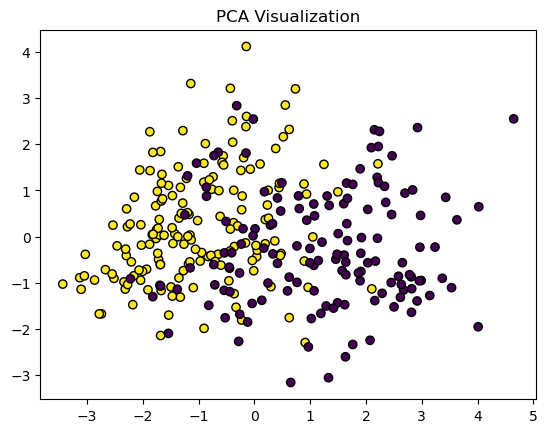

In [7]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from minisom import MiniSom

# Step 1: Load the dataset
data_path = "C:\\Users\\ASUS\\Desktop\\class of ann\\HOMEWORK4\\dataset\\Heart Dataset\\New folder\\heart.csv"
data = pd.read_csv(data_path)

# Step 2: Split data into features and labels
X = data.drop(columns=['target'])
y = data['target']

# Step 3: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Reduce dimensionality using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 5: Use MiniSom for clustering
som = MiniSom(x=10, y=10, input_len=2, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X_pca)
som.train_random(X_pca, 100)  # Train the SOM

# Assign clusters to the data
som_clusters = np.array([som.winner(x) for x in X_pca])
som_cluster_labels = [f"{c[0]}-{c[1]}" for c in som_clusters]  # Convert to cluster labels

# Step 6: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Step 7: Use RBF kernel for classification
clf = SVC(kernel='rbf', gamma='scale')
clf.fit(X_train, y_train)

# Predict on test and train data
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

# Compute and print accuracies
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

print(f"Train Accuracy: {accuracy_train:.2f}")
print(f"Test Accuracy: {accuracy_test:.2f}")

# Display classification report for test data
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_pred_test))

# Visualization 
import matplotlib.pyplot as plt
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('PCA Visualization')
plt.show()